In [ ]:
# Read the CSV file
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import numpy as np

file_name = "req_time_x"
file_path = "C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week7/ReqResampleData/req_freq_x.csv"
reqData = pd.read_csv(file_path)
for i in reqData.columns:
    reqData.drop(reqData[(reqData[i] == -999)].index, inplace=True)

reqData.drop(reqData[(reqData["Joyner-Boore Dist. (km)"] == 0)].index, inplace=True)
for i in reqData.columns:
    print(i)

In [ ]:
X_val = ["Earthquake Magnitude",
         "Hypocenter Depth (km)", "Joyner-Boore Dist. (km)", "Vs30 (m/s) selected for analysis"]
Xreq = reqData[X_val]
Xreq["log10(Joyner-Boore Dist. (km))"] = np.log10(Xreq["Joyner-Boore Dist. (km)"])
Xreq["log10(Vs30 (m/s) selected for analysis)"] = np.log10(
    Xreq["Vs30 (m/s) selected for analysis"])

# Y_val=["0", "0.206896552", "0.413793103", "0.620689655", "0.827586207", "1.034482759", "1.24137931", "1.448275862", "1.655172414", "1.862068966", "2.068965517", "2.275862069", "2.482758621", "2.689655172", "2.896551724", "3.103448276", "3.310344828", "3.517241379", "3.724137931", "3.931034483", "4.137931034", "4.344827586", "4.551724138", "4.75862069", "4.965517241", "5.172413793", "5.379310345", "5.586206897", "5.793103448", "6",
#                ]
Y_val = ["0.0", "0.100401606425703", "0.200803212851406", "0.301204819277108", "0.401606425702811", "0.502008032128514", "0.602409638554217", "0.70281124497992", "0.803212851405622", "0.903614457831325", "1.00401606425703", "1.10441767068273", "1.20481927710843", "1.30522088353414", "1.40562248995984", "1.50602409638554", "1.60642570281124", "1.70682730923695", "1.80722891566265", "1.90763052208835", "2.00803212851406", "2.10843373493976", "2.20883534136546", "2.30923694779116", "2.40963855421687", "2.51004016064257", "2.61044176706827", "2.71084337349398", "2.81124497991968", "2.91164658634538", "3.01204819277108", "3.11244979919679", "3.21285140562249", "3.31325301204819", "3.4136546184739", "3.5140562248996", "3.6144578313253", "3.714859437751", "3.81526104417671", "3.91566265060241", "4.01606425702811", "4.11646586345381", "4.21686746987952", "4.31726907630522", "4.41767068273092", "4.51807228915663", "4.61847389558233", "4.71887550200803", "4.81927710843374", "4.91967871485944", "5.02008032128514", "5.12048192771084", "5.22088353413655", "5.32128514056225", "5.42168674698795", "5.52208835341365", "5.62248995983936", "5.72289156626506", "5.82329317269076", "5.92369477911647", "6.02409638554217", "6.12449799196787", "6.22489959839357", "6.32530120481928", "6.42570281124498", "6.52610441767068", "6.62650602409639", "6.72690763052209", "6.82730923694779", "6.92771084337349", "7.0281124497992", "7.1285140562249", "7.2289156626506", "7.3293172690763", "7.42971887550201", "7.53012048192771", "7.63052208835341", "7.73092369477912", "7.83132530120482", "7.93172690763052", "8.03212851405623", "8.13253012048193", "8.23293172690763", "8.33333333333333", "8.43373493975904", "8.53413654618474", "8.63453815261044", "8.73493975903614", "8.83534136546185", "8.93574297188755", "9.03614457831325", "9.13654618473896", "9.23694779116466", "9.33734939759036", "9.43775100401606", "9.53815261044177", "9.63855421686747", "9.73895582329317", "9.83935742971888", "9.93975903614458", "10.0401606425703", "10.140562248996", "10.2409638554217", "10.3413654618474", "10.4417670682731", "10.5421686746988", "10.6425702811245", "10.7429718875502", "10.8433734939759", "10.9437751004016", "11.0441767068273", "11.144578313253", "11.2449799196787", "11.3453815261044", "11.4457831325301", "11.5461847389558", "11.6465863453815", "11.7469879518072", "11.8473895582329", "11.9477911646586", "12.0481927710843", "12.14859437751", "12.2489959839357", "12.3493975903614", "12.4497991967871", "12.5502008032129", "12.6506024096386", "12.7510040160643", "12.85140562249", "12.9518072289157", "13.0522088353414", "13.1526104417671", "13.2530120481928", "13.3534136546185", "13.4538152610442", "13.5542168674699", "13.6546184738956", "13.7550200803213", "13.855421686747", "13.9558232931727", "14.0562248995984", "14.1566265060241", "14.2570281124498", "14.3574297188755", "14.4578313253012", "14.5582329317269", "14.6586345381526", "14.7590361445783", "14.859437751004", "14.9598393574297", "15.0602409638554", "15.1606425702811", "15.2610441767068", "15.3614457831325", "15.4618473895582", "15.5622489959839", "15.6626506024096", "15.7630522088353", "15.863453815261", "15.9638554216867", "16.0642570281125", "16.1646586345382", "16.2650602409639", "16.3654618473896", "16.4658634538153", "16.566265060241", "16.6666666666667", "16.7670682730924", "16.8674698795181", "16.9678714859438", "17.0682730923695", "17.1686746987952", "17.2690763052209", "17.3694779116466", "17.4698795180723", "17.570281124498", "17.6706827309237", "17.7710843373494", "17.8714859437751", "17.9718875502008", "18.0722891566265", "18.1726907630522", "18.2730923694779", "18.3734939759036", "18.4738955823293", "18.574297188755", "18.6746987951807", "18.7751004016064", "18.8755020080321", "18.9759036144578", "19.0763052208835", "19.1767068273092", "19.2771084337349", "19.3775100401606", "19.4779116465863", "19.578313253012", "19.6787148594378", "19.7791164658635", "19.8795180722892", "19.9799196787149", "20.0803212851406", "20.1807228915663", "20.281124497992", "20.3815261044177", "20.4819277108434", "20.5823293172691", "20.6827309236948", "20.7831325301205", "20.8835341365462", "20.9839357429719", "21.0843373493976", "21.1847389558233", "21.285140562249", "21.3855421686747", "21.4859437751004", "21.5863453815261", "21.6867469879518", "21.7871485943775", "21.8875502008032", "21.9879518072289", "22.0883534136546", "22.1887550200803", "22.289156626506", "22.3895582329317", "22.4899598393574", "22.5903614457831", "22.6907630522088", "22.7911646586345", "22.8915662650602", "22.9919678714859", "23.0923694779116", "23.1927710843373", "23.2931726907631", "23.3935742971888", "23.4939759036145", "23.5943775100402", "23.6947791164659", "23.7951807228916", "23.8955823293173", "23.995983935743", "24.0963855421687", "24.1967871485944", "24.2971887550201", "24.3975903614458", "24.4979919678715", "24.5983935742972", "24.6987951807229", "24.7991967871486", "24.8995983935743", "25.0"
         ] #for frequency
Yreq = reqData[Y_val]
# Yreq_log10 = np.log10(Yreq)

# print(Yreq_log10.shape)


# Split data into train and test sets
# Normalizing the data

scalerX = StandardScaler()
scalerY = StandardScaler()
X_normalized = scalerX.fit_transform(Xreq)
# Y_normalized = scalerY.fit_transform(Yreq_log10)
Y_normalized = scalerY.fit_transform(Yreq)


dataset_size = len(reqData)
batch_size = 256
train_size = int(dataset_size * 0.85)
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, Y_normalized, test_size=0.2, random_state=42)

print(y_train.shape)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

class BayesianNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BayesianNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class ProbabilisticBNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.5):
        super(ProbabilisticBNN, self).__init__()
        self.network = BayesianNetwork(input_dim, hidden_dim, output_dim)
        self.dropout_rate = dropout_rate

    def forward(self, x):
        output = self.network(x)
        return output

    def mc_dropout_forward(self, x, n_samples=20):
        predictions = []
        for _ in range(n_samples):
            with torch.no_grad():
                output = F.dropout(self.network(x), p=self.dropout_rate, training=True)
            predictions.append(output.unsqueeze(0))
        predictions = torch.cat(predictions, dim=0)
        mean_prediction = predictions.mean(dim=0)
        std_prediction = predictions.std(dim=0)
        return mean_prediction, std_prediction

    def kl_divergence(self):
        kl_div = 0
        for module in self.modules():
            if hasattr(module, 'kl_loss'):
                kl_div += module.kl_loss()
        return kl_div

def train(model, train_loader, optimizer, criterion, epochs=100):
    model.train()
    mse_values = []
    loss_values = []
    for epoch in range(epochs):
        total_loss = 0
        total_mse = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets) + model.kl_divergence()  # Add KL divergence to the loss
            mse = criterion(outputs, targets).item()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            total_mse += mse
        avg_loss = total_loss / len(train_loader)
        avg_mse = total_mse / len(train_loader)
        loss_values.append(avg_loss)
        mse_values.append(avg_mse)
        print(f'Epoch {epoch+1}, Loss: {avg_loss}, MSE: {avg_mse}')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), loss_values, label='Total Loss')
    plt.plot(range(1, epochs + 1), mse_values, label='MSE')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Variation of Loss and MSE with Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

def test(model, test_loader):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.numpy())
            actuals.extend(targets.numpy())
    
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    return predictions, actuals

# Example usage:
# Assuming you have input data X_train, y_train, X_test, and y_test

# Convert your data into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=32)

# Define model, optimizer, and loss function
input_dim = X_train.shape[1]
# output_dim = 1  # Assuming regression task with single output
output_dim = y_train.shape[1]  # Assuming regression task with single output
hidden_dim = 100
learning_rate = 0.001
dropout_rate = 0.5  # Dropout rate for MC Dropout
model = ProbabilisticBNN(input_dim, hidden_dim, output_dim, dropout_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Train the model
train(model, train_loader, optimizer, criterion, epochs=500)

# Test the model
predictions, actuals = test(model, test_loader)




For Frequency Envelope 
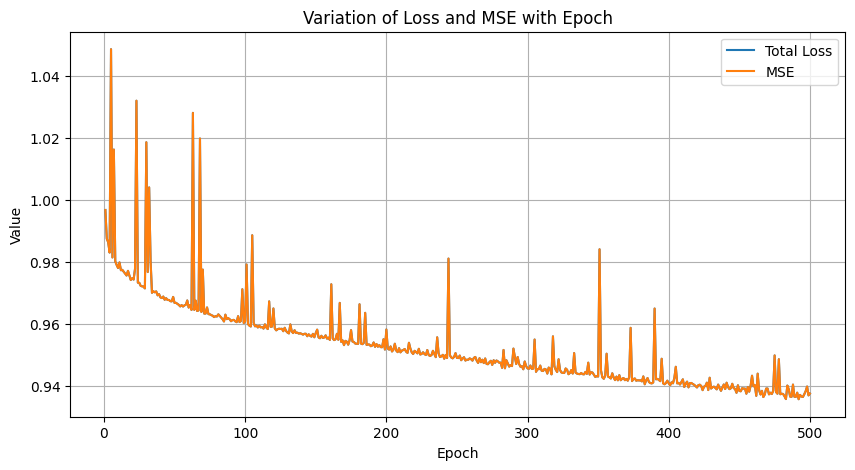


In [ ]:
plt.figure(figsize=(8, 8))

# Loop over all subarrays
for i in range(actuals.shape[0]):
    plt.scatter(actuals[i], predictions[i], alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.grid(True)
plt.show()

For frequecy envelope. \n
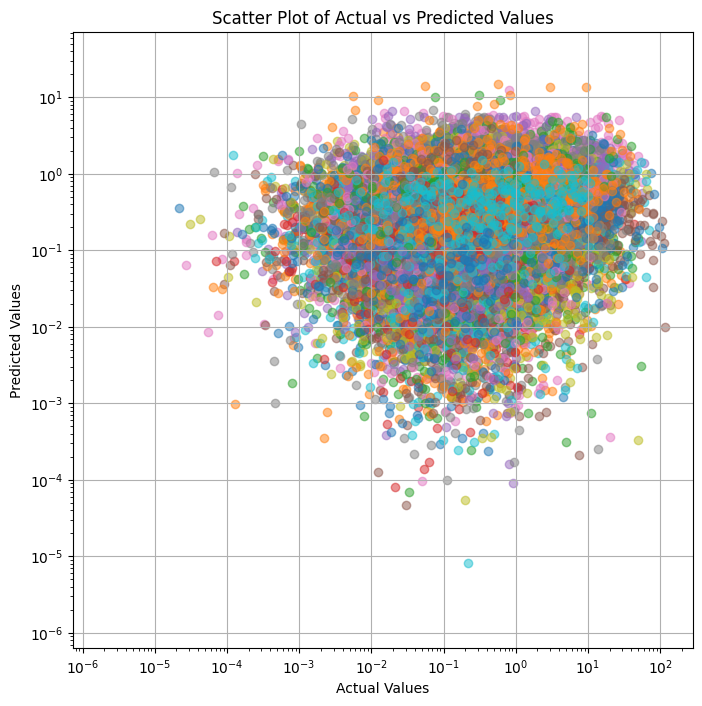

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score

# Test the model
predictions, actuals = test(model, test_loader)

# Calculate MSE and R2 score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Calculation of confidence intervals
mean_predictions, std_predictions = model.mc_dropout_forward(X_test)
confidence_intervals = (mean_predictions - 2 * std_predictions, mean_predictions + 2 * std_predictions)

# Plotting the confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:, 0], mean_predictions[:, 0], label='Prediction', color='blue')
plt.fill_between(y_test[:, 0], confidence_intervals[0][:, 0], confidence_intervals[1][:, 0], alpha=0.3, label='Confidence Interval', color='orange')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.xscale('log')
plt.yscale('log')
plt.title('Prediction with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()




For frequecy : 
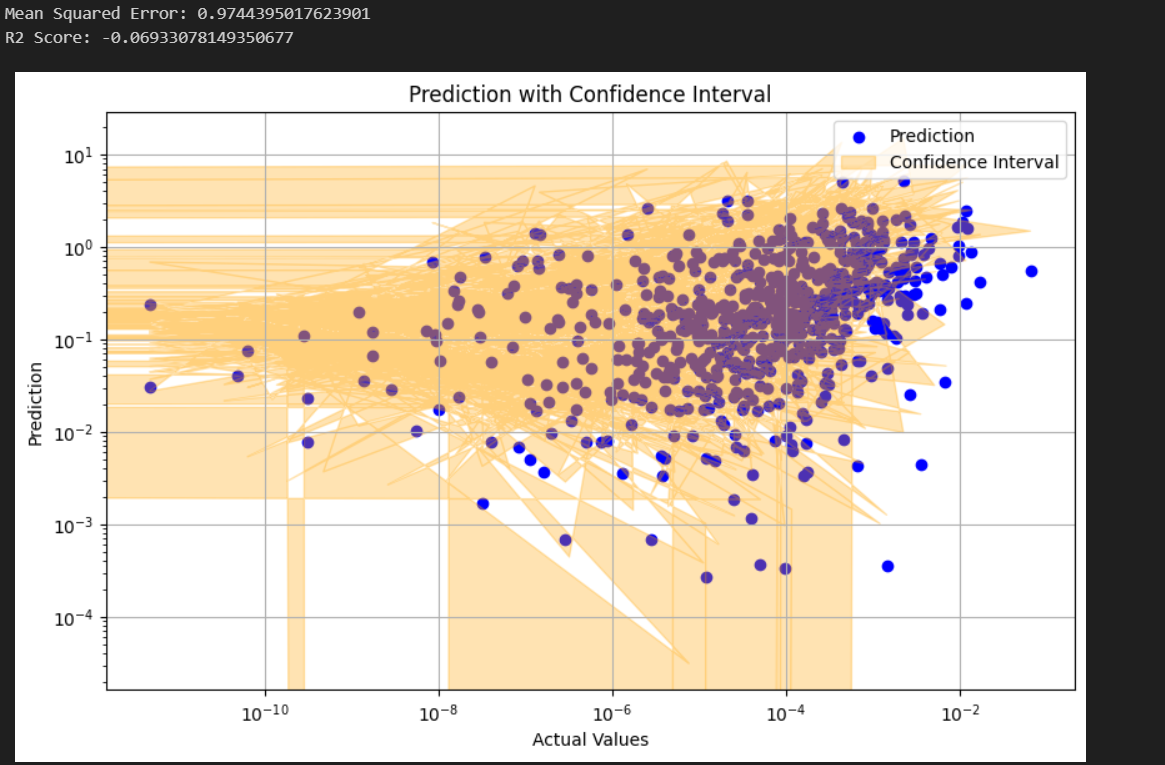

In [ ]:
# print the actual and predicted values with confidence intervals
# for i in range(len(y_test)):
    # print(f'Actual: {y_test[i]}, Predicted: {mean_predictions[i]}, Confidence Interval: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}')


# Convert the tensors to numpy arrays
y_test = y_test.numpy()
mean_predictions = mean_predictions.numpy()
lower_confidence_intervals = confidence_intervals[0].numpy()
upper_confidence_intervals = confidence_intervals[1].numpy()

In [ ]:
#converting to actual values
y_test = scalerY.inverse_transform(y_test)
mean_predictions = scalerY.inverse_transform(mean_predictions)
lower_confidence_intervals = scalerY.inverse_transform(lower_confidence_intervals)
upper_confidence_intervals = scalerY.inverse_transform(upper_confidence_intervals)

# Get the number of columns
# num_columns = actuals.shape[1]

# # Create a list of column names
# column_names = [f"Column {i+1}" for i in range(num_columns)]

Ytestdf= pd.DataFrame(y_test, columns=Y_val)
Ypreddf= pd.DataFrame(mean_predictions, columns=Y_val)
Ylowerdf= pd.DataFrame(lower_confidence_intervals, columns=Y_val)
Yupperdf= pd.DataFrame(upper_confidence_intervals, columns=Y_val)

In [ ]:
#Making a data frame having actual , predicted and confidence interval values for each column
finalDf=pd.DataFrame({f"Actual_{Y_val[0]}":Ytestdf[Y_val[0]], f"Predicted_{Y_val[0]}":Ypreddf[Y_val[0]], f"Lower Confidence Interval_{Y_val[0]}":Ylowerdf[Y_val[0]], f"Upper Confidence Interval_{Y_val[0]}":Yupperdf[Y_val[0]]})
for i in range(len(Y_val)-1):
    finalDf=pd.concat([finalDf,pd.DataFrame({f"Actual_{Y_val[i+1]}":Ytestdf[Y_val[i+1]], f"Predicted_{Y_val[i+1]}":Ypreddf[Y_val[i+1]], f"Lower Confidence Interval_{Y_val[i+1]}":Ylowerdf[Y_val[i+1]], f"Upper Confidence Interval_{Y_val[i+1]}":Yupperdf[Y_val[i+1]]})], axis=1,join='inner')

# Save the data frame to a CSV file
finalDf.to_csv("C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week7/BNNresult/Resultfreq.csv", index=False)



In [ ]:
#calculate and print the epistemix uncertainty and aleatoric uncertainty
epistemic_uncertainty = torch.mean(std_predictions**2)
aleatoric_uncertainty = np.mean(np.exp(model.network.fc2.weight.detach().numpy())**2)
print(f'Epistemic Uncertainty: {epistemic_uncertainty}')
print(f'Aleatoric Uncertainty: {aleatoric_uncertainty}')


For Frequecy : 
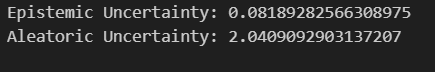

In [ ]:
# torch.save(model.state_dict(), 'model_T0.010S.pth')